In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\ljant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ljant\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
#1. Get the data:
df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\06_Advanced_Statistics\lab-customer-analysis-round-5\files_for_lab\csv_files\marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#2. Organising/dealing with the df:

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# datatypes in df
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [6]:
# checking/droping duplicates
df.drop_duplicates()
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
# Checking for NaN values
sum_na = df.isna().sum()
print (sum_na)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [8]:
#Attention: 0 values; need to be transformed before generating the plot 
df['income'].replace(0, np.nan, inplace=True)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,NaN,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,NaN,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941.0,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604.0,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,NaN,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941.0,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
# Checking for NaN again values
sum_na = df.isna().sum()
print (sum_na)

'''
For now, I'm leaving NaN values as they are, as they do not interfere with the following exercise. If needed later, I can still
drop or fill them.
'''

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                           2317
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
dtype: int64


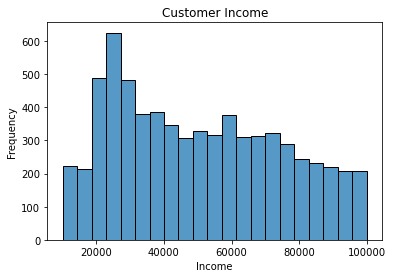

'\nInterpretation:\n- Normal distribtution could be given; only a statistic test can identify the distribution of the data\n'

In [22]:
#3. Explore the data
# Looking at 'income' as an example:
sns.histplot(df['income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Customer Income')

plt.show()

'''
Interpretation:
- Normal distribtution could be given; only a statistic test can identify the distribution of the data
'''

In [23]:
# 4. Processing the data
# a) xy-split of the data

df.shape #(9134, 24)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train #(7307, 24)

# df_train will contain 80% of the data
# df_test will contain 20% of the data
# The number for random_state was chosen randomly to ensure, each time running the code the same data is selected

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
7999,JO68735,California,2292.791874,No,Basic,Bachelor,2/6/11,Unemployed,F,NaN,...,30,0,1,Personal Auto,Personal L3,Offer1,Branch,460.800000,Two-Door Car,Medsize
7936,NJ55678,Arizona,7824.492263,No,Basic,Bachelor,2/23/11,Employed,F,64543.0,...,84,0,2,Personal Auto,Personal L3,Offer2,Call Center,200.177163,Four-Door Car,Medsize
8678,BY88565,California,5219.754045,No,Basic,College,2/23/11,Employed,F,48203.0,...,47,0,6,Personal Auto,Personal L2,Offer4,Call Center,413.238845,Four-Door Car,Medsize
8943,FM12425,California,19337.901030,No,Extended,College,2/8/11,Employed,M,26488.0,...,39,0,7,Personal Auto,Personal L2,Offer1,Web,1321.584957,Luxury SUV,Medsize
1538,BU53191,Arizona,8834.322784,No,Basic,Bachelor,2/2/11,Employed,F,34133.0,...,72,0,7,Personal Auto,Personal L1,Offer1,Call Center,226.968400,SUV,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,SC92090,Arizona,8717.049833,Yes,Basic,College,2/14/11,Employed,M,83846.0,...,94,3,2,Personal Auto,Personal L2,Offer2,Agent,355.200000,Four-Door Car,Large
4023,DI42246,Arizona,2230.755716,No,Basic,College,1/20/11,Unemployed,M,NaN,...,49,0,1,Personal Auto,Personal L2,Offer1,Agent,325.886070,Four-Door Car,Medsize
7259,MT58123,California,13869.927050,Yes,Basic,College,1/21/11,Employed,M,28432.0,...,59,0,2,Corporate Auto,Corporate L2,Offer2,Branch,612.300581,SUV,Small
5200,SU95720,California,8923.113112,No,Extended,High School or Below,1/14/11,Unemployed,M,NaN,...,80,0,9,Personal Auto,Personal L3,Offer4,Branch,900.000000,SUV,Small


In [20]:
# selecting only numerical data
df_num = df_train.select_dtypes('number')
df_num
#(7307, 8)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
5123,4768.955924,51144.0,61,28,32,1,9,223.305224
7738,2827.559570,NaN,79,30,25,0,1,568.800000
214,2912.892035,81097.0,74,7,67,0,1,355.200000
8580,5138.244998,72264.0,64,2,66,0,9,272.649844
7857,2610.369217,54737.0,66,3,86,0,1,391.970334
...,...,...,...,...,...,...,...,...
5734,7334.328083,87957.0,61,31,63,0,2,308.321335
5191,5498.940679,22520.0,73,17,64,0,3,350.400000
5390,8992.779137,NaN,129,13,4,0,7,1059.572464
860,14635.451580,NaN,139,5,56,0,2,667.200000


In [24]:
#b) Normalisation

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # initialising the model; normalising the data
normalised_data = scaler.fit_transform(df_num) # and fit to data
normalised_data = pd.DataFrame(normalised_data, columns = df_num.columns)
normalised_data
#(7307, 8)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.035258,0.457029,0.000000,0.800000,0.323232,0.2,1.000,0.077150
1,0.011416,NaN,0.075949,0.857143,0.252525,0.0,0.000,0.196569
2,0.012464,0.790047,0.054852,0.200000,0.676768,0.0,0.000,0.122739
3,0.039793,0.691842,0.012658,0.057143,0.666667,0.0,1.000,0.094206
4,0.008748,0.496976,0.021097,0.085714,0.868687,0.0,0.000,0.135448
...,...,...,...,...,...,...,...,...
7302,0.066763,0.866317,0.000000,0.885714,0.636364,0.0,0.125,0.106536
7303,0.044223,0.138786,0.050633,0.485714,0.646465,0.0,0.250,0.121080
7304,0.087130,NaN,0.286920,0.371429,0.040404,0.0,0.750,0.366202
7305,0.156427,NaN,0.329114,0.142857,0.565657,0.0,0.125,0.230580
